**Linear Regression**

Step 1: Setting Up Your Environment

In [1]:
# Install the necessary libraries
!pip install scikit-learn matplotlib fastapi pydantic uvicorn

Step 2: Load and Explore Dataset

In [3]:
import pandas as pd
# Load the dataset with the correct path
df = pd.read_csv('/home/diana/Documents/linear_regression_model/summative/linear_regression/crop_yield.csv', low_memory=False)
df.to_csv('/home/diana/Documents/linear_regression_model/summative/linear_regression/crop_yield_compressed.csv', index=False, compression="zip")
# Show the first few rows
df.head()


,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


Step 3: Building the Linear Regression **Model**

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset with the correct path
df = pd.read_csv('/home/diana/Documents/linear_regression_model/summative/linear_regression/crop_yield.csv')
# Show the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Handle missing values
# Fill numeric columns with their mean and categorical columns with the mode
for column in df.select_dtypes(include=['number']).columns:
    df[column].fillna(df[column].mean(), inplace=True)

for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Categorical data encoding
label_encoder = LabelEncoder()
categorical_columns = ['Soil_Type', 'Crop', 'Weather_Condition', 'Region']

# Encode categorical variables safely
for col in categorical_columns:
    if col in df.columns:  # Ensure the column exists before encoding
        df[col] = label_encoder.fit_transform(df[col])

# Convert boolean columns to 0s and 1s
if 'Fertilizer_Used' in df.columns:
    df['Fertilizer_Used'] = df['Fertilizer_Used'].map({True: 1, False: 0})

if 'Irrigation_Used' in df.columns:
    df['Irrigation_Used'] = df['Irrigation_Used'].map({True: 1, False: 0})

# Define features (X) and target variable (y)
feature_columns = ['Rainfall_mm', 'Temperature_Celsius', 'Soil_Type',
                   'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition', 'Region']

if 'Yield_tons_per_hectare' in df.columns:
    X = df[feature_columns]
    y = df['Yield_tons_per_hectare']
else:
    raise ValueError("Target variable 'Yield_tons_per_hectare' not found in dataset.")

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Show the shapes of the train and test sets
print("\nTraining and testing set shapes:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


First few rows of the dataset:
  Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0   West     Sandy   Cotton   897.077239            27.676966   
1  South      Clay     Rice   992.673282            18.026142   
2  North      Loam   Barley   147.998025            29.794042   
3  North     Sandy  Soybean   986.866331            16.644190   
4  South      Silt    Wheat   730.379174            31.620687   

   Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0            False             True            Cloudy              122   
1             True             True             Rainy              140   
2            False            False             Sunny              106   
3            False             True             Rainy              146   
4             True             True            Cloudy              110   

   Yield_tons_per_hectare  
0                6.555816  
1                8.527341  
2                1.127443  
3                6.51

/tmp/ipykernel_13279/3667615902.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
/tmp/ipykernel_13279/3667615902.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'


Training and testing set shapes:
X_train shape: (800000, 7)
X_test shape: (200000, 7)
y_train shape: (800000,)
y_test shape: (200000,)


Step 4: Train the Linear Regression Model

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)  # Now should work fine
# Make predictions
y_pred = model.predict(X_test)
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')


Mean Squared Error: 0.2507735296250576
R-squared Score: 0.9130148597121187


# Prediction on Single Data Point

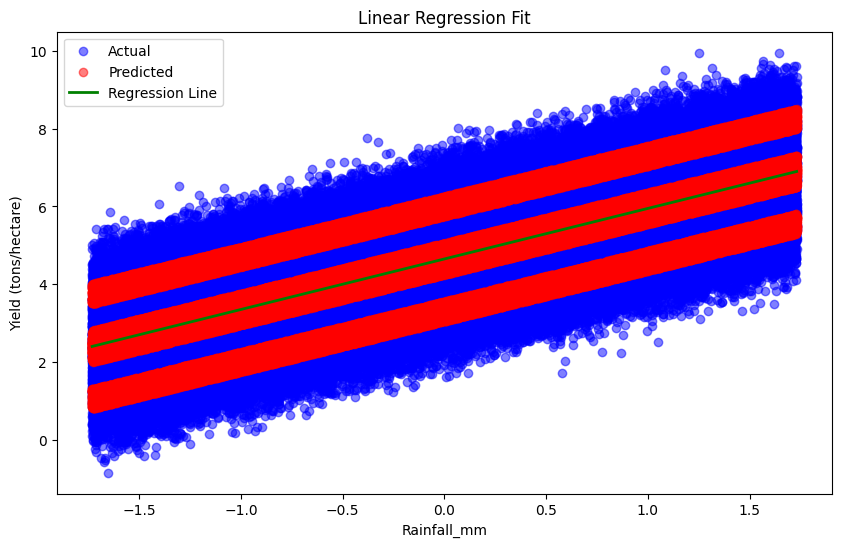

In [6]:
# Visualize linear regression fit for one important feature
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Choose one feature to plot against target (e.g., Rainfall)
feature_to_plot = 'Rainfall_mm'
feature_idx = list(feature_columns).index(feature_to_plot)

# Plot actual test data
plt.scatter(X_test[:, feature_idx], y_test, color='blue', alpha=0.5, label='Actual')

# Plot predictions
plt.scatter(X_test[:, feature_idx], model.predict(X_test), color='red', alpha=0.5, label='Predicted')

# Add regression line
x_line = np.linspace(min(X_test[:, feature_idx]), max(X_test[:, feature_idx]), 100)
y_line = model.coef_[feature_idx] * x_line + model.intercept_
plt.plot(x_line, y_line, color='green', linewidth=2, label='Regression Line')

plt.xlabel(feature_to_plot)
plt.ylabel('Yield (tons/hectare)')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

In [7]:
!pip install seaborn matplotlib

In [8]:
# Make prediction on single test data point
single_test_point = X_test[0:1]  # Get first row of test data
print("Single test point features:")
print(single_test_point)

# Make prediction (using your trained LINEAR REGRESSION model)
prediction = model.predict(single_test_point)  # Changed rf_model → model
print(f"\nPredicted yield: {prediction[0]:.2f} tons/hectare")
print(f"Actual yield: {y_test.iloc[0]:.2f} tons/hectare")

Single test point features:
[[ 0.63448816 -0.50260243  1.46323694 -0.99988001 -0.99898252  1.22355757
   1.34143465]]

Predicted yield: 4.05 tons/hectare
Actual yield: 3.84 tons/hectare


Step 5: Plot the Loss Curve for Train and Test Data

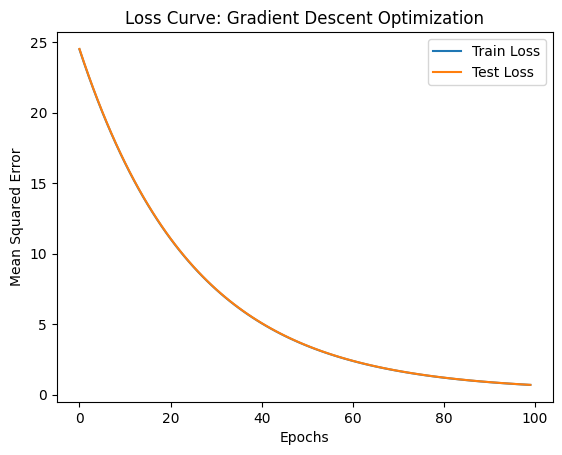

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Initialize variables
epochs = 100  # Number of epochs for gradient descent
learning_rate = 0.01

# Initialize weights (coefficients) and bias
weights = np.zeros(X_train.shape[1])
bias = 0

# Store loss history for both train and test data
train_loss_history = []
test_loss_history = []

# Gradient Descent Loop
for epoch in range(epochs):
    # Make predictions on the training set
    y_train_pred = np.dot(X_train, weights) + bias
    # Calculate training loss (Mean Squared Error)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_loss_history.append(train_mse)

    # Make predictions on the test set
    y_test_pred = np.dot(X_test, weights) + bias
    # Calculate test loss (Mean Squared Error)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_loss_history.append(test_mse)

    # Compute gradients (derivatives of loss with respect to weights and bias)
    d_weights = -(2 / X_train.shape[0]) * np.dot(X_train.T, (y_train - y_train_pred))
    d_bias = -(2 / X_train.shape[0]) * np.sum(y_train - y_train_pred)

    # Update weights and bias using the learning rate
    weights -= learning_rate * d_weights
    bias -= learning_rate * d_bias

# Plot the loss curve for train and test data
plt.plot(range(epochs), train_loss_history, label="Train Loss")
plt.plot(range(epochs), test_loss_history, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Loss Curve: Gradient Descent Optimization")
plt.legend()
plt.show()

Step 6: Compare with Decision Trees and Random Forest

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)

# Train Random Forest with parallel processing and fewer estimators
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_leaf=5, n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)

# Print results
# Since we don't have loss_history for Decision Trees and Random Forest, we'll print the MSE for each model
print(f"Decision Tree MSE: {dt_mse}")
print(f"Random Forest MSE: {rf_mse}")

Decision Tree MSE: 0.5280499285032527
Random Forest MSE: 0.2516485218289632


Step 7: Save the Best Performing Model


In [11]:
import joblib

# Select the best model
best_model = None
best_mse = min(dt_mse, rf_mse)  # Compare MSE for Decision Tree and Random Forest

if best_mse == dt_mse:
    print("Saving Decision Tree model as best...")
    best_model = dt_model  # Assign the trained Decision Tree model
    joblib.dump(best_model, 'best_decision_tree.pkl')

else:
    print("Saving Random Forest model as best...")
    best_model = rf_model  # Assign the trained Random Forest model
joblib.dump(best_model, 'best_random_forest.pkl', compress=3)
print("Best model saved successfully!")

Saving Random Forest model as best...
Best model saved successfully!


In [12]:
import joblib
import os
from sklearn.ensemble import RandomForestRegressor

# 1. Reduce model size by adjusting hyperparameters before training
rf_model = RandomForestRegressor(
    n_estimators=50,       # Reduce from default 100 (major size factor)
    max_depth=10,          # Limit tree depth
    min_samples_leaf=5,    # Reduce overfitting
    n_jobs=-1,            # Keep parallel processing
    random_state=42
)

# 2. Train the model (assuming X_train, y_train exist)
rf_model.fit(X_train, y_train)

# 3. Further compression when saving
print("Saving optimized Random Forest model...")
joblib.dump(
    rf_model,
    '/home/diana/Documents/linear_regression_model/summative/linear_regression/random_forest_model.pkl',
    compress=3,           # Higher compression level (1-9)
    protocol=4           # Efficient binary protocol
)

# 4. For the best model selection (same logic but with optimized models)
best_model = rf_model if rf_mse < dt_mse else dt_model

joblib.dump(
    best_model,
    '/home/diana/Documents/linear_regression_model/summative/linear_regression/best_model.pkl',
    compress=3,
    protocol=4
)

print(f"Final model size: {os.path.getsize('/home/diana/Documents/linear_regression_model/summative/linear_regression/best_model.pkl')/1e6:.1f}MB")  # Verify size

Saving optimized Random Forest model...
Final model size: 2.9MB


In [17]:
print(dt_model)
print(rf_model)

DecisionTreeRegressor()
RandomForestRegressor(n_estimators=10, n_jobs=-1)


In [18]:
!pip install seaborn matplotlib

# Correlation Heatmap of Numerical Features

Available numerical columns: ['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition', 'Days_to_Harvest', 'Yield_tons_per_hectare']


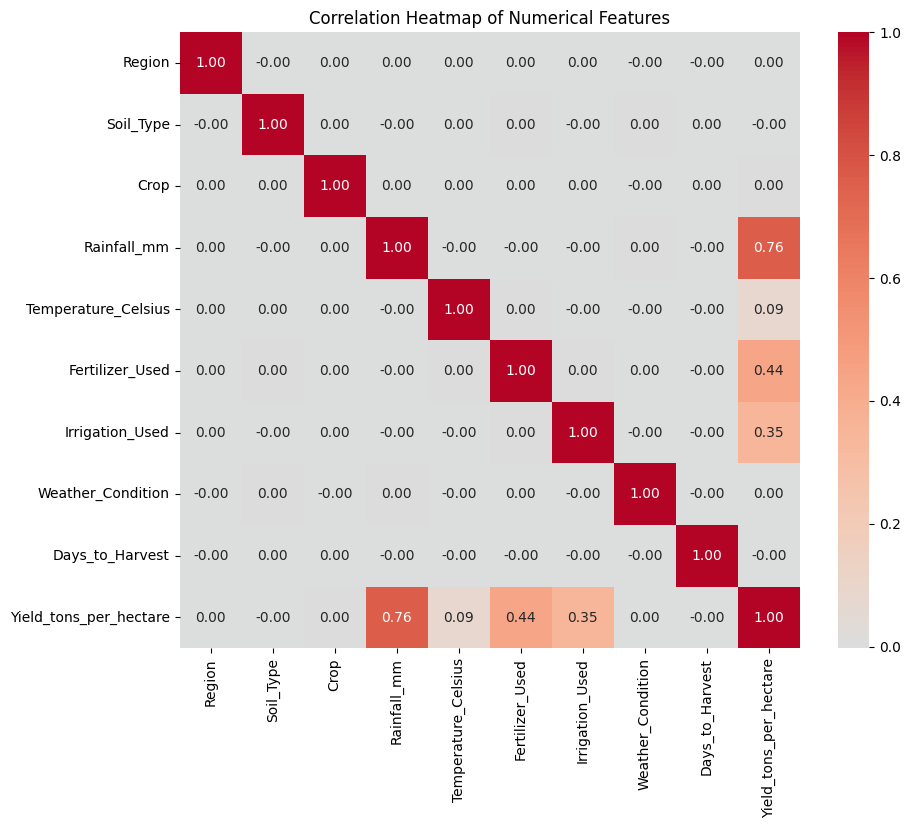

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check available numerical columns
available_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Available numerical columns:", available_cols)

# Proceed with the visualization if we have suitable columns
if len(available_cols) >= 2:
    corr_matrix = df[available_cols].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Correlation Heatmap of Numerical Features')
    plt.show()
else:
    print("Not enough numerical columns for correlation analysis. Available numerical columns:", available_cols)

#  Scatterplots Showing Relationships Between Key Features and Yield

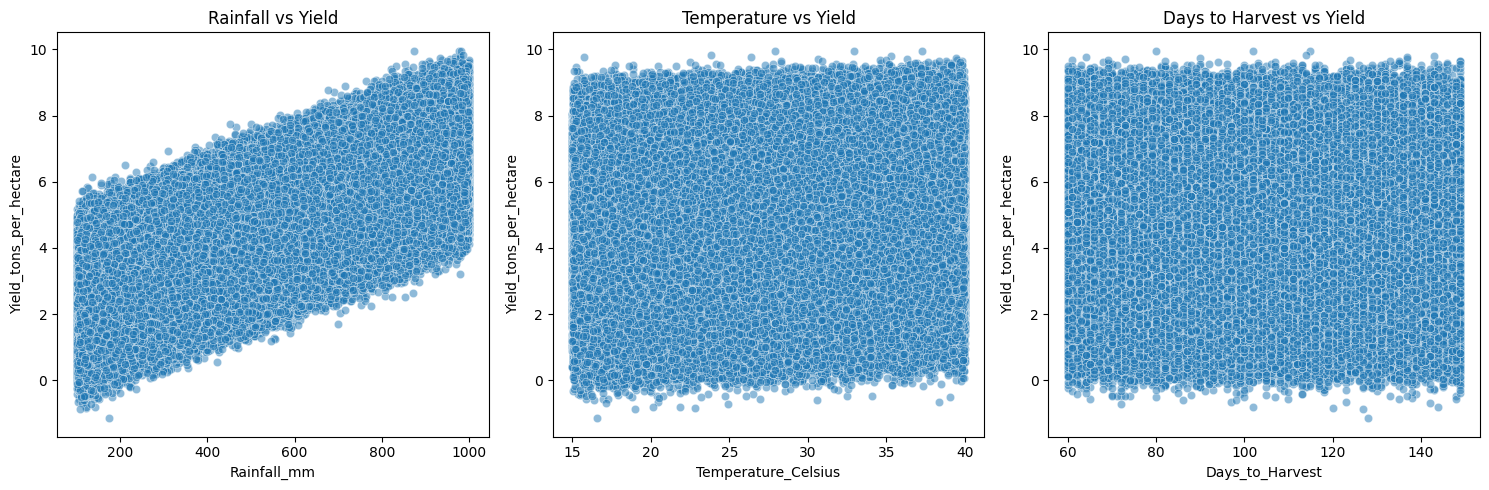

In [14]:
# Set up the figure
plt.figure(figsize=(15, 5))

# Plot 1: Rainfall vs Yield
plt.subplot(1, 3, 1)
sns.scatterplot(x='Rainfall_mm', y='Yield_tons_per_hectare', data=df, alpha=0.5)
plt.title('Rainfall vs Yield')

# Plot 2: Temperature vs Yield
plt.subplot(1, 3, 2)
sns.scatterplot(x='Temperature_Celsius', y='Yield_tons_per_hectare', data=df, alpha=0.5)
plt.title('Temperature vs Yield')

# Plot 3: Days to Harvest vs Yield
plt.subplot(1, 3, 3)
sns.scatterplot(x='Days_to_Harvest', y='Yield_tons_per_hectare', data=df, alpha=0.5)
plt.title('Days to Harvest vs Yield')

plt.tight_layout()
plt.show()